## Scraping Euro 2021 Data

This tutorial will demonstrate how to scrape football data/results for Euro 2021 using Python. In this tutorial, we will use:

-  `requests` to send HTTP requests to the BBC to retrieve HTML
-  `BeautifulSoup` to parse HTML from the response and extract data.
-  `pandas` for some helpful date-related utilities

### Objectives

1. Understand how to use the `BeautifulSoup` library to parse raw HTML content and extract data that we are interested in.
2. Understand how to use the `requests` library to send simple GET requests to a website/url.
3. Understand how to construct code that will fetch and extract data across multiple pages that we are interested in.

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

The BBC's pages for the Euros have the following format for getting results:


- https://www.bbc.com/sport/football/european-championship/scores-fixtures/2021-06-11
- https://www.bbc.com/sport/football/european-championship/scores-fixtures/2021-06-12
- ........
- https://www.bbc.com/sport/football/european-championship/scores-fixtures/2021-07-10
- https://www.bbc.com/sport/football/european-championship/scores-fixtures/2021-07-11

The same base URL is used, followed by a date at the end of the URL. This date is what we need to generate dynamically, and append to the base URL.

The tournament starts on `2021-06-11` and ends on `2021-07-11`. So let's set this structure up below.

In [3]:
base_url = 'https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures'
start_date = '2021-06-11'
end_date = '2021-07-11'

# use the date_range() function from pandas to generate all the days between
# the start date and end date
tournament_dates = pd.date_range(start_date, end_date)
tournament_dates  # .values

DatetimeIndex(['2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
               '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11'],
              dtype='datetime64[ns]', freq='D')

We can append each of the dates to our `base_url`, as follows

In [4]:
for dt in tournament_dates[:5]:
  print(f"{base_url}/{dt.date()}")

https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures/2021-06-11
https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures/2021-06-12
https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures/2021-06-13
https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures/2021-06-14
https://www.bbc.co.uk/sport/football/european-championship/scores-fixtures/2021-06-15


Let's use a list comprehension to set the URLs that we're going to scrape data from.

In [5]:
urls = [f"{base_url}/{dt.date()}" for dt in tournament_dates]
# urls

Next, we want to send an HTTP request to the BBC pages to retrieve the page contents. These contents will be passed to the `BeautifulSoup` object, allowing us to parse the HTML and search the document for the data we want.

We will use the `requests` library to send GET requests to each of our URLs.

In accordance with 'ethical scraping' best practices, we'll sleep for 1 second in between each request to the BBC to avoid putting any strain on their servers.

Firstly, let's see what a single GET request to the first URL gives us.

In [6]:
response = requests.get(urls[0])
# response # 200 status code indicates successful request/response
response.text[:50] # decodes and returns HTML as a string - here we get the first 50 characters

'<!DOCTYPE html>\n<html lang="en-GB" class="b-reith-'

We can inspect the HTML for this page more clearly using a browser's developer tools. We are interested in getting the result for this URL https://www.bbc.com/sport/football/european-championship/scores-fixtures/2021-06-11

Looking at the developer tools, we can see the result is contained within an HTML `<article>` tag with a class of `sp-c-fixture`.



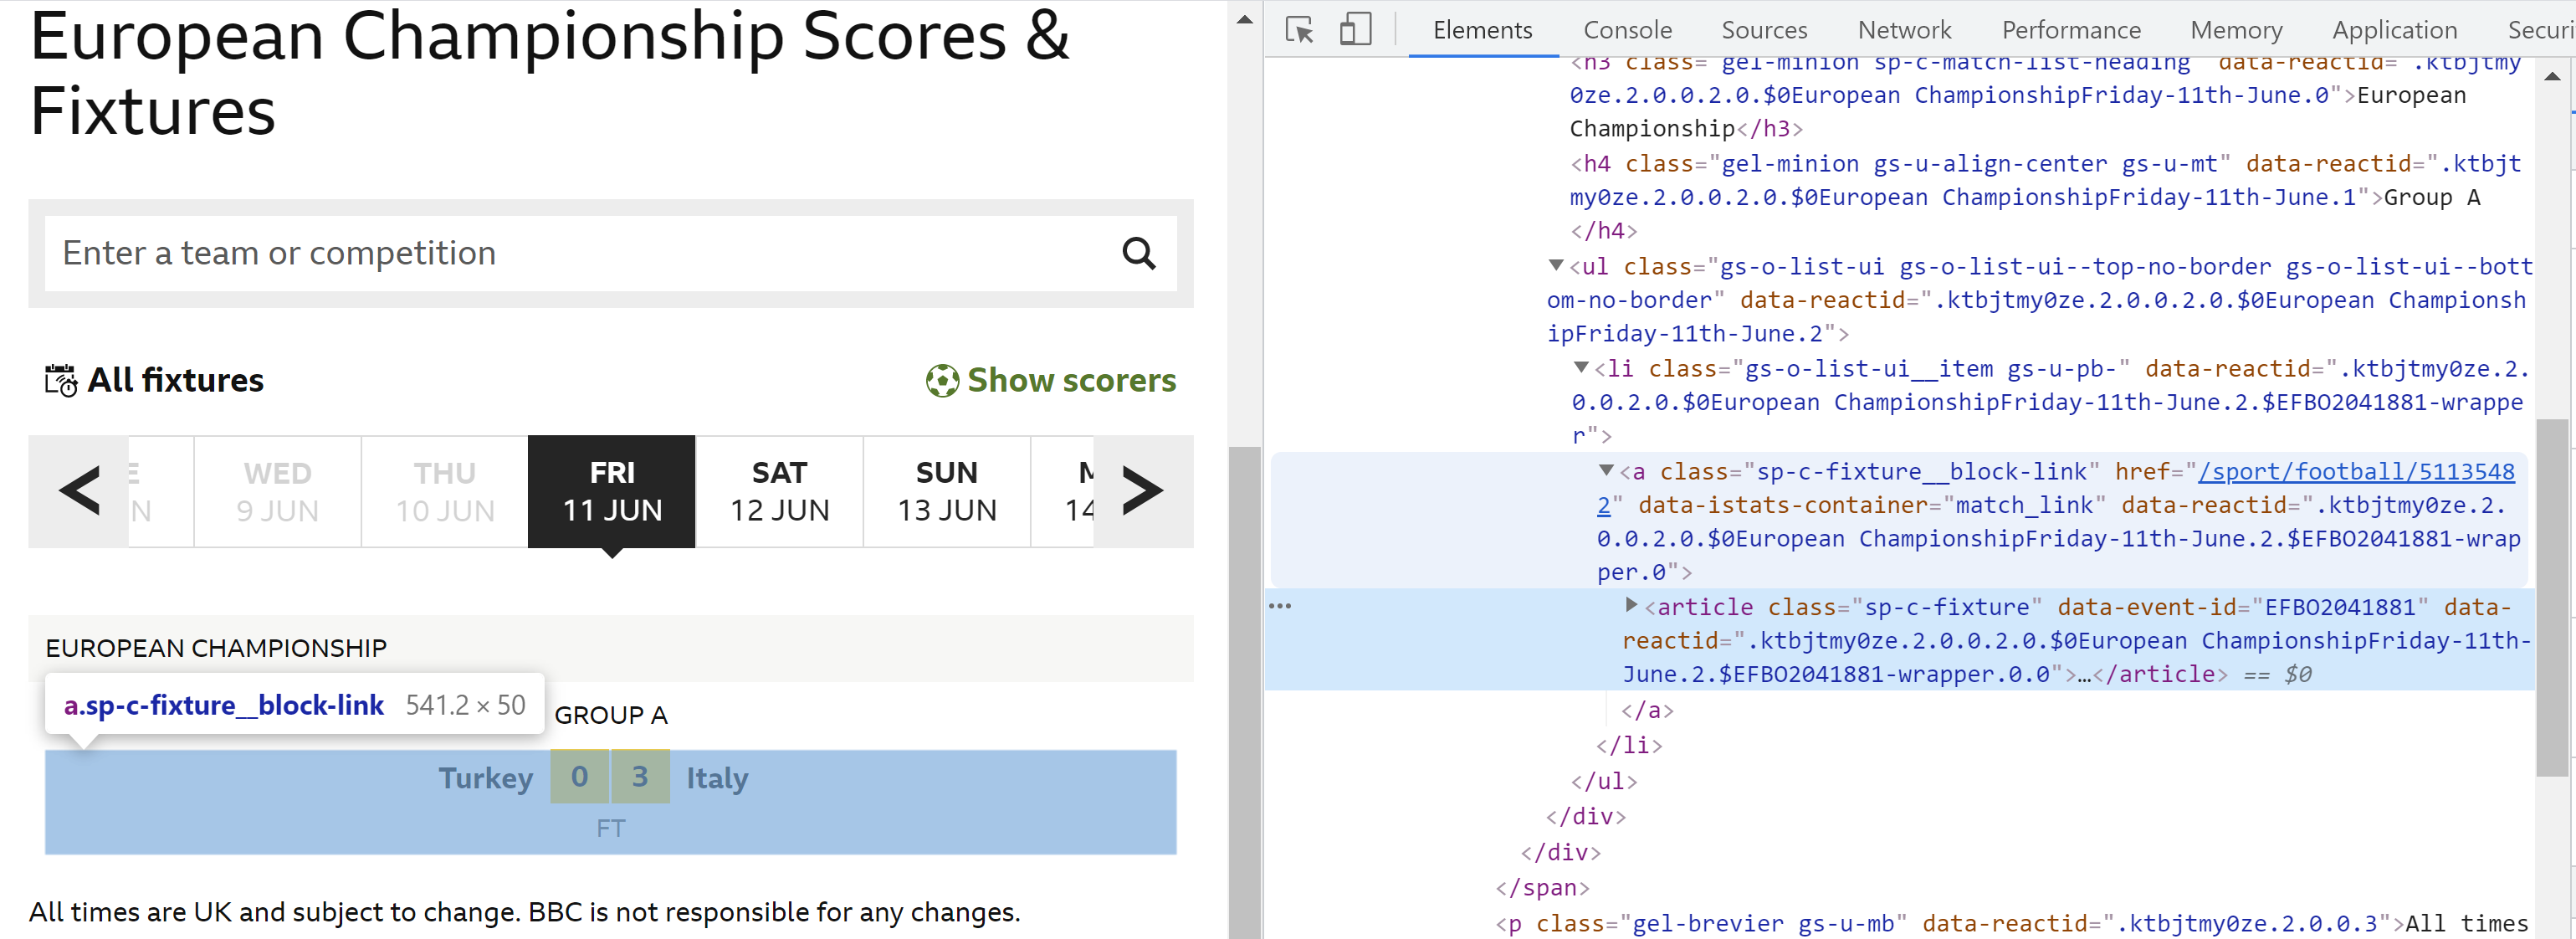

Let's grab this data using BeautifulSoup. To do this, we pass our `response.text` to the `BeautifulSoup` object, and set the parser as the `html.parser` to indicate that we're parsing HTML text

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
type(soup) # bs4.BeautifulSoup object

bs4.BeautifulSoup

We can use BeautifulSoup's search functionality to search the document for the `<article>` tag with the class name `sp-c-fixture`

The `soup.find_all()` function is used to search for all these tags - remember, there may be more than one on the page, as some days of football had up to 4 matches. 

`find_all()` returns a **list** of all the given tags that match the parameters it is given.

In [ ]:
fixtures = soup.find_all('article', {'class': 'sp-c-fixture'})
print(fixtures)
print(type(fixtures))  # ResultSet
print(type(fixtures[0])) # Tag
print(f"{len(fixtures)} match found")

[<article class="sp-c-fixture" data-event-id="EFBO2041881" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO2041881-wrapper.0.0"><div class="sp-c-fixture__wrapper" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO2041881-wrapper.0.0.0"><span class="sp-c-fixture__team sp-c-fixture__team--home" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO2041881-wrapper.0.0.0.0" data-team-id="TFBB362"><span class="sp-c-fixture__team-name sp-c-fixture__team-name--home" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO2041881-wrapper.0.0.0.0.0"><span class="sp-c-fixture__team-name-wrap" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO2041881-wrapper.0.0.0.0.0.0"><abbr class="gs-u-display-block gs-u-display-none@m sp-c-fixture__team-name-trunc" data-reactid=".1953jtrxcks.2.0.0.2.0.$0European ChampionshipFriday-11th-June.2.$EFBO20

OK, we have the result(s).

We now want to extract the relevant data:

- each team's **name**
- how many **goals** each team scored

We can search and extract elements that are children of the `<article>` tags that we have found. 

We can use the `select_one()` method on the `Tag` objects that represent each fixture that are returned above.

`select_one()` and `select()` are similar to `find_all()` which we used above, with a few notable differences:

1. We can use CSS selectors to very specifically target elements in the document.
2. `select_one()` will return a single element, rather than a list. `select()` - which we will not use - returns a list, similar to `find_all()`.



From each fixture, we can extract the home and away team by looking for the following selectors under the `<article>` that represents the fixture:

- `.sp-c-fixture__team--home .sp-c-fixture__team-name-trunc` class for the home team.
- `.sp-c-fixture__team--away .sp-c-fixture__team-name-trunc` class for the away team.
- `.sp-c-fixture__number--home` class for the home team's number of goals
- `.sp-c-fixture__number--away` class for the away team's number of goals

You can see the home team's selector below:

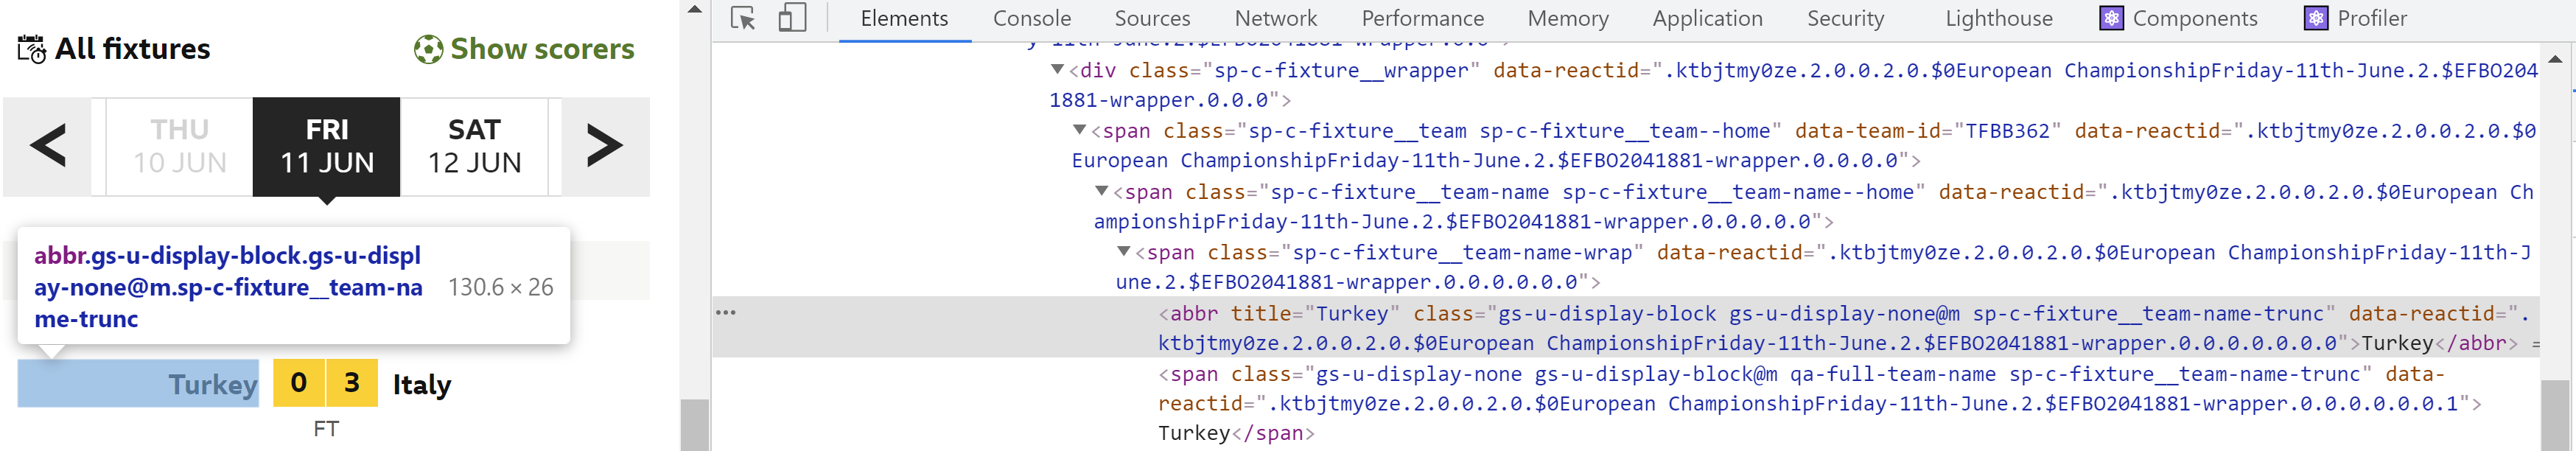

Because we're using CSS selectors, we will use the `select_one()` method rather than the `find()` method.



In [ ]:
home = fixtures[0].select_one('.sp-c-fixture__team--home .sp-c-fixture__team-name-trunc').text
away = fixtures[0].select_one('.sp-c-fixture__team--away .sp-c-fixture__team-name-trunc').text
home_goals = fixtures[0].select_one('.sp-c-fixture__number--home').text
away_goals = fixtures[0].select_one('.sp-c-fixture__number--away').text

def show_result(home, home_goals, away, away_goals) -> str:
  return f"{home} {home_goals} - {away_goals} {away}"

show_result(home, home_goals, away, away_goals)

'Turkey 0 - 3 Italy'

Let's apply this approach to **all** of the URLs, for each match day.

**Note**: this will take a while to run, because we're sending many HTTP requests, and sleeping for a second between requests.

In [ ]:
import time

results = []

for url in urls:
  response = requests.get(url)
  time.sleep(1)
  
  soup = BeautifulSoup(response.text)

  # get all fixtures on the page
  fixtures = soup.find_all('article', {'class': 'sp-c-fixture'})

  for fixture in fixtures:
    home = fixture.select_one('.sp-c-fixture__team--home .sp-c-fixture__team-name-trunc').text
    away = fixture.select_one('.sp-c-fixture__team--away .sp-c-fixture__team-name-trunc').text
    home_goals = fixture.select_one('.sp-c-fixture__number--home').text
    away_goals = fixture.select_one('.sp-c-fixture__number--away').text
    results.append(show_result(home, home_goals, away, away_goals))

Let's look at the results

In [ ]:
results

['Turkey 0 - 3 Italy',
 'Wales 1 - 1 Switzerland',
 'Denmark 0 - 1 Finland',
 'Belgium 3 - 0 Russia',
 'Austria 3 - 1 North Macedonia',
 'Netherlands 3 - 2 Ukraine',
 'England 1 - 0 Croatia',
 'Scotland 0 - 2 Czech Rep',
 'Poland 1 - 2 Slovakia',
 'Spain 0 - 0 Sweden',
 'Hungary 0 - 3 Portugal',
 'France 1 - 0 Germany',
 'Turkey 0 - 2 Wales',
 'Italy 3 - 0 Switzerland',
 'Finland 0 - 1 Russia',
 'Denmark 1 - 2 Belgium',
 'Ukraine 2 - 1 North Macedonia',
 'Netherlands 2 - 0 Austria',
 'Croatia 1 - 1 Czech Rep',
 'England 0 - 0 Scotland',
 'Sweden 1 - 0 Slovakia',
 'Spain 1 - 1 Poland',
 'Hungary 1 - 1 France',
 'Portugal 2 - 4 Germany',
 'Italy 1 - 0 Wales',
 'Switzerland 3 - 1 Turkey',
 'Finland 0 - 2 Belgium',
 'Russia 1 - 4 Denmark',
 'North Macedonia 0 - 3 Netherlands',
 'Ukraine 0 - 1 Austria',
 'Croatia 3 - 1 Scotland',
 'Czech Rep 0 - 1 England',
 'Slovakia 0 - 5 Spain',
 'Sweden 3 - 2 Poland',
 'Germany 2 - 2 Hungary',
 'Portugal 2 - 2 France',
 'Wales 0 - 4 Denmark',
 'Italy 2 

This works well, but we have no way of identifying the winner in knockout games, if the game was won on penalties.

Let's find the penalty winners!

Knockout rounds started on the 26th July, so we'll create a `KNOCKOUT_GAMES_START` variable, using a pandas` `Timestamp`, and for each game, will check whether it's on (or after) this date.

If it is, we will search for the penalty data in the web document - this can be found in the `.sp-c-fixture__win-message` class.

In [ ]:
results = []
KNOCKOUT_GAMES_START = pd.Timestamp('2021-06-26')

# We need to redefine our show_result() function to take penalties into account
def show_result(home, home_goals, away, away_goals, pens=None) -> str:
  if pens:
    return f"{home} {home_goals} - {away_goals} {away} ({pens})"  
  return f"{home} {home_goals} - {away_goals} {away}"


# NOTE: look at urls[15:18]
for url in urls:
  response = requests.get(url)
  # time.sleep(1)
  
  soup = BeautifulSoup(response.text)

  # get all fixtures on the page
  fixtures = soup.find_all('article', {'class': 'sp-c-fixture'})

  for fixture in fixtures:
    home = fixture.select_one('.sp-c-fixture__team--home .sp-c-fixture__team-name-trunc').text
    away = fixture.select_one('.sp-c-fixture__team--away .sp-c-fixture__team-name-trunc').text
    home_goals = fixture.select_one('.sp-c-fixture__number--home').text
    away_goals = fixture.select_one('.sp-c-fixture__number--away').text

    game_date = pd.Timestamp(url.split("/")[-1])
    if game_date >= KNOCKOUT_GAMES_START:
      pens = fixture.select_one('.sp-c-fixture__win-message')
      if pens is not None:
        results.append(show_result(home, home_goals, away, away_goals, pens.text))
        continue
    
    results.append(show_result(home, home_goals, away, away_goals))


In [ ]:
results

['Turkey 0 - 3 Italy',
 'Wales 1 - 1 Switzerland',
 'Denmark 0 - 1 Finland',
 'Belgium 3 - 0 Russia',
 'Austria 3 - 1 North Macedonia',
 'Netherlands 3 - 2 Ukraine',
 'England 1 - 0 Croatia',
 'Scotland 0 - 2 Czech Rep',
 'Poland 1 - 2 Slovakia',
 'Spain 0 - 0 Sweden',
 'Hungary 0 - 3 Portugal',
 'France 1 - 0 Germany',
 'Turkey 0 - 2 Wales',
 'Italy 3 - 0 Switzerland',
 'Finland 0 - 1 Russia',
 'Denmark 1 - 2 Belgium',
 'Ukraine 2 - 1 North Macedonia',
 'Netherlands 2 - 0 Austria',
 'Croatia 1 - 1 Czech Rep',
 'England 0 - 0 Scotland',
 'Sweden 1 - 0 Slovakia',
 'Spain 1 - 1 Poland',
 'Hungary 1 - 1 France',
 'Portugal 2 - 4 Germany',
 'Italy 1 - 0 Wales',
 'Switzerland 3 - 1 Turkey',
 'Finland 0 - 2 Belgium',
 'Russia 1 - 4 Denmark',
 'North Macedonia 0 - 3 Netherlands',
 'Ukraine 0 - 1 Austria',
 'Croatia 3 - 1 Scotland',
 'Czech Rep 0 - 1 England',
 'Slovakia 0 - 5 Spain',
 'Sweden 3 - 2 Poland',
 'Germany 2 - 2 Hungary',
 'Portugal 2 - 2 France',
 'Wales 0 - 4 Denmark',
 'Italy 2 

This is good - we've got the data we needed from the page, and are displaying all the accurate results from the tournament!

### Next Steps

We would like to model this data in a more natural manner, rather than just having strings that represent the results.

In the next lesson, we will look at creating Python **classes** that model the data. In particular, we will create:

- A `Result` class to represent a result in the tournament, with attributes for each team and the goals each team scored in the match. We will create methods to determine who won a match, lost a match, whether the result was a draw, and more. 
- A `TeamStat` class to represent a team's overall statistics in the tournament (goals scored, goals conceded, games won on penalties, etc).

We will use type-annotated Python 3.7 **dataclasses** to model the data. We will also look at some "dunder" methods from [Python's data model](https://docs.python.org/3/reference/datamodel.html) for modelling certain features in an intuitive, Pythonic way.